<a href="https://colab.research.google.com/github/claredavies/ArtificialIntelligience/blob/main/WeLoveComputationalIntelligence.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import Libraries

In [66]:
!pip install scikit-fuzzy
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl
import pandas as pd
import matplotlib.pyplot as plt
from itertools import product
import collections
from collections import OrderedDict

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


# Solving 3.2

In [76]:
# ATTENCIÒN THIS BLOCK OF CODE IS FOR SOLVING 3.2

# functions
def yp_solver(x):
  res = 0.2 * np.sin(2*np.pi*x + np.pi/4) + 0.5
  return res

def membership_solver(x, j):
  res = 0
  if j == 1:
    # right, down
    if (x >= 0 and x <= 0.25):
      res = -4 * x + 1
  if j == 2:
    # left, up
    if (x >= 0 and x <= 0.25):
      res = 4 * x
    # right, down
    if (x >= 0.25 and x <= 0.5):
      res = -4 * x + 2
  if j == 3:
    # left, up
    if (x >= 0.25 and x <= 0.5):
      res = 4 * x - 1
    # right, down
    if (x  >= 0.5 and x <= 0.75):
      res = -4 * x + 3
  if j == 4:
    # left, up
    if (x >= 0.5 and x <= 0.75):
      res = 4 * x - 2
    # right, down
    if (x >= 0.75 and x <= 1):
      res = -4 * x + 4
  if j == 5:
    # left, up
    if (x >= 0.75 and x <= 1):
      res = 4 * x - 3
  return res

def yxp_solver(xp_val, b_vals, k_val=5):
  # this is the numerator
  numerator = 0
  for i in range(k_val):
    cur = membership_solver(xp_val, i+1) * b_vals[i]
    numerator += cur
  # this is the denominator
  denominator = 0
  for i in range(k_val):
    cur = membership_solver(xp_val, i+1)
    denominator += cur
  res = numerator/denominator
  return res

def performance_index(x_arr, yps, b_vals):
  m = len(x_arr)
  res = 0
  for p in range(m):
    res += (np.power(yxp_solver(x_arr[p], b_vals) - yps[p], 2))/2
  return res

def weight_calc(xp_val, j, alpha=10):
  # this is the μ 
  membership_value = membership_solver(xp_val, j)
  # this is the weight for j
  res = np.power(membership_value, alpha)
  return res

# TODO: is this correct
def b_calc(xps, yps, j):
  m = len(xps)
  # this is the numerator
  numerator = 0
  for p in range(0, m):
    weight_p = weight_calc(xps[p], j)
    weight_p_multiply_yp = weight_p * yps[p]
    numerator += weight_p_multiply_yp
  # this is the denominator 
  denominator = 0
  for p in range(0, m):
    weight_p = weight_calc(xps[p], j)
    denominator += weight_p
  res = numerator/denominator
  return res

x_arr = np.arange(0, 1.1, 0.1)
yp = [yp_solver(dot) for dot in x_arr]
print(x_arr)
print(yp)
b_vals = []
for i in range(5):
  res = b_calc(x_arr, yp, i+1)
  b_vals.append(res)
  print("for j =", i+1, np.round(res, 3))

print(np.round(performance_index(x_arr, yp, b_vals), 3))


[0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1. ]
[0.6414213562373094, 0.6975376681190275, 0.6782013048376736, 0.5907980999479094, 0.46871310699195384, 0.3585786437626905, 0.3024623318809724, 0.3217986951623264, 0.4092019000520906, 0.5312868930080461, 0.6414213562373094]
for j = 1 0.642
for j = 2 0.634
for j = 3 0.359
for j = 4 0.366
for j = 5 0.641
0.005


# Solving 4.2

In [77]:
# ATTENCIÒN THIS BLOCK OF CODE IS FOR SOLVING 4.2

# functions
def yp_solver(x1, x2):
  inside = (1 + np.power(x1, -2) + np.power(x2, -1.5))
  res = np.power(inside, 2)
  return np.round(res, 2)

def membership_solver(x, j):
  res = 0
  if j == 1:
    # right, down
    if (x >= 0 and x <= 0.25):
      res = -4 * x + 1
  if j == 2:
    # left, up
    if (x >= 0 and x <= 0.25):
      res = 4 * x
    # right, down
    if (x >= 0.25 and x <= 0.5):
      res = -4 * x + 2
  if j == 3:
    # left, up
    if (x >= 0.25 and x <= 0.5):
      res = 4 * x - 1
    # right, down
    if (x  >= 0.5 and x <= 0.75):
      res = -4 * x + 3
  if j == 4:
    # left, up
    if (x >= 0.5 and x <= 0.75):
      res = 4 * x - 2
    # right, down
    if (x >= 0.75 and x <= 1):
      res = -4 * x + 4
  if j == 5:
    # left, up
    if (x >= 0.75 and x <= 1):
      res = 4 * x - 3
  return res

def yxp_solver(x1_val, x2_val, b_dict, k1_val=5, k2_val=5):
  # this is the numerator
  numerator = 0
  for j1 in range(k1_val):
    for j2 in range(k2_val):
      cur = membership_solver(x1_val, j1+1) * membership_solver(x2_val, j2+1) * b_dict[j1+1][j2+1]
      numerator += cur
  # this is the denominator
  denominator = 0
  for j1 in range(k1_val):
    for j2 in range(k2_val):
      cur = membership_solver(x1_val, j1+1) * membership_solver(x2_val, j2+1)
      denominator += cur
  res = numerator/denominator
  return res

def performance_index(x1, x2, yps, b_dict):
  m = len(x1)
  res = 0
  for p in range(m):
    res += (np.power(yxp_solver(x1[p], x2[p], b_dict) - yps[p], 2))/2
  return res

def weight_calc(xp1_val, xp2_val, j1, j2, alpha=5):
  # this is the μ 
  membership_value = membership_solver(xp1_val, j1) * membership_solver(xp2_val, j2)
  
  # this is the weight for j1 and j2
  res = np.power(membership_value, alpha)
  return res

# TODO: is this correct
def b_calc(x1s, x2s, yps, j1, j2):
  m = len(x1s)
  
  # this is the numerator
  numerator = 0
  for p in range(0, m):
    weight_p = weight_calc(x1s[p],x2s[p], j1, j2)
    weight_p_multiply_yp = weight_p * yps[p]
    numerator += weight_p_multiply_yp
  
  # this is the denominator 
  denominator = 0
  for p in range(0, m):
    weight_p = weight_calc(x1s[p], x2s[p], j1, j2)
    denominator += weight_p
  res = numerator/denominator
  return res

def normalize_data(data):
    return np.round((data - np.min(data)) / (np.max(data) - np.min(data)), 2)
    
x1 = [1.40, 4.28, 1.18, 1.96, 1.85, 3.66, 3.64, 4.51, 3.77, 4.84, 1.05, 4.51, 1.84, 1.67, 2.03, 3.62, 1.67, 3.38, 2.83, 1.48, 3.37, 2.84, 1.19, 4.10, 1.65, 2.00, 2.71, 1.78, 3.61, 2.24, 1.81, 4.85, 3.41, 1.38, 2.46, 2.66, 4.44, 3.11, 4.47, 1.35, 1.24, 2.81, 1.92, 4.61, 3.04, 4.82, 2.58, 4.14, 4.35, 2.22]
x2 = [1.80, 4.96, 4.29, 1.90, 1.43, 1.60, 2.14, 1.52, 1.45, 4.32, 2.55, 1.37, 4.43, 2.81, 1.88, 1.95, 2.23, 3.70, 1.77, 4.44, 2.13, 1.24, 1.53, 1.71, 1.38, 2.06, 4.13, 1.11, 2.27, 3.74, 3.18, 4.66, 3.88, 2.55, 2.12, 4.42, 4.71, 1.06, 3.66, 1.76, 1.41, 1.35, 4.25, 2.68, 4.97, 3.80, 1.97, 4.76, 3.90, 1.35]
# NOTE: there is a faulty data on element number 42 (index 41) supposed to be 3.11 but here it's 1.97
yp_orig = [3.70, 1.31, 3.35, 2.70, 3.52, 2.46, 1.95, 2.51, 2.70, 1.33, 4.63, 2.80, 1.97, 2.47, 2.66, 2.08, 2.75, 1.51, 2.40, 2.44, 1.99, 3.42, 4.99, 2.27, 3.94, 2.52, 1.58, 4.71, 1.87, 1.79, 2.20, 1.30, 1.48, 3.14, 2.22, 1.56, 1.32, 4.08, 1.42, 3.91, 5.05, 1.97, 1.92, 1.63, 1.44, 1.39, 2.29, 1.33, 1.40, 3.39]
yp_auto = yp_solver(x1, x2)

x1 = normalize_data(x1)
x2 = normalize_data(x2)
yp_orig = normalize_data(yp_orig)
yp_auto = normalize_data(yp_auto)


# b dictionary for {j1: {j2: value}}
b_dict = {1: {}, 2: {}, 3: {}, 4: {}, 5: {}}
for i in range(5):
  for j in range(5):
    res = b_calc(x1, x2, yp_orig, i+1, j+1)
    b_dict[i+1][j+1] = res
    # print("for j1 =", i+1, "and j2 =", j+1, np.round(res, 3))
# print(yxp_solver(x1[0], x2[0], b_dict), yp_orig[0])
print(performance_index(x1, x2, yp_orig, b_dict))
# b_dict

0.17501711237803136


In [78]:
def membership_solver_B(x, j):
  res = 0
  if j == 1:
    # left, up
    if (x >= 0 and x <= 1/3):
      res = 3 * x
    # right, down
    if (x >= 1/3 and x <= 2/3):
      res = -3 * x + 2
  if j == 2:
    # left, up
    if (x >= 1/3 and x <= 2/3):
      res = 3 * x - 1
    # right, down
    if (x >= 2/3 and x <= 1):
      res = -3 * x + 3
  return res

def membership_solver_max(x):
  res = 0
  res_arr = []
  idx = []
  centroids = []
  # if j == 1:
  # right, down
  if (x >= 0 and x <= 0.25):
    res = -4 * x + 1
    idx.append('S')
    centroids.append(0)
    res_arr.append(res)
  
  # if j == 2:
  # left, up
  if (x >= 0 and x <= 0.25):
    res = 4 * x
    idx.append('MS')
    centroids.append(0.25)
    res_arr.append(res)
  # right, down
  if (x >= 0.25 and x <= 0.5):
    res = -4 * x + 2
    idx.append('MS')
    centroids.append(0.25)
    res_arr.append(res)

  # if j == 3:
  # left, up
  if (x >= 0.25 and x <= 0.5):
    res = 4 * x - 1
    idx.append('M')
    centroids.append(0.5)
    res_arr.append(res)
  # right, down
  if (x  >= 0.5 and x <= 0.75):
    res = -4 * x + 3
    idx.append('M')
    centroids.append(0.5)
    res_arr.append(res)
  
  # if j == 4:
  # left, up
  if (x >= 0.5 and x <= 0.75):
    res = 4 * x - 2
    idx.append('ML')
    centroids.append(0.75)
    res_arr.append(res)
  # right, down
  if (x >= 0.75 and x <= 1):
    res = -4 * x + 4
    idx.append('ML')
    centroids.append(0.75)
    res_arr.append(res)
  
  # if j == 5:
  # left, up
  if (x >= 0.75 and x <= 1):
    res = 4 * x - 3
    idx.append('L')
    centroids.append(1)
    res_arr.append(res)
  max_value = max(res_arr)
  max_index = res_arr.index(max_value)
  max_class = idx[max_index]
  max_centroid = centroids[max_index]
  return max_class, max_value, max_centroid

def membership_solver_second_max(x):
  res = 0
  res_arr = []
  idx = []
  centroids = []
  # if j == 1:
  # right, down
  if (x >= 0 and x <= 0.25):
    res = -4 * x + 1
    idx.append('S')
    centroids.append(0)
    res_arr.append(res)
  
  # if j == 2:
  # left, up
  if (x >= 0 and x <= 0.25):
    res = 4 * x
    idx.append('MS')
    centroids.append(0.25)
    res_arr.append(res)
  # right, down
  if (x >= 0.25 and x <= 0.5):
    res = -4 * x + 2
    idx.append('MS')
    centroids.append(0.25)
    res_arr.append(res)

  # if j == 3:
  # left, up
  if (x >= 0.25 and x <= 0.5):
    res = 4 * x - 1
    idx.append('M')
    centroids.append(0.5)
    res_arr.append(res)
  # right, down
  if (x  >= 0.5 and x <= 0.75):
    res = -4 * x + 3
    idx.append('M')
    centroids.append(0.5)
    res_arr.append(res)
  
  # if j == 4:
  # left, up
  if (x >= 0.5 and x <= 0.75):
    res = 4 * x - 2
    idx.append('ML')
    centroids.append(0.75)
    res_arr.append(res)
  # right, down
  if (x >= 0.75 and x <= 1):
    res = -4 * x + 4
    idx.append('ML')
    centroids.append(0.75)
    res_arr.append(res)
  
  # if j == 5:
  # left, up
  if (x >= 0.75 and x <= 1):
    res = 4 * x - 3
    idx.append('L')
    centroids.append(1)
    res_arr.append(res)
  max_value = max(res_arr)
  second_max_value=[a for i,a in enumerate(res_arr) if a<max_value][0]
  second_max_index = res_arr.index(second_max_value)
  second_max_class = idx[second_max_index]
  second_max_centroid = centroids[second_max_index]
  return second_max_class, second_max_value, second_max_centroid

In [79]:
main_dict = {1: {}, 2: {}, 3: {}, 4: {}, 5: {}}
second_dict = {1: {}, 2: {}, 3: {}, 4: {}, 5: {}}
for i in range(5):
  for j in range(5):
    b_j1_j2_val = b_dict[i+1][j+1]
    max_class, max_value, _ = membership_solver_max(b_j1_j2_val)
    main_dict[i+1][j+1] = max_class
    # print("for j1 =", i+1, "and j2 =", j+1, np.round(max_value, 3), "with class", max_class)

for i in range(5):
  for j in range(5):
    b_j1_j2_val = b_dict[i+1][j+1]
    max_second_class, max_second_value, _ = membership_solver_second_max(b_j1_j2_val)
    second_dict[i+1][j+1] = max_second_class
    # print("for j1 =", i+1, "and j2 =", j+1, np.round(max_second_value, 3), "with class", max_second_class)
# display(b_star_dict)
display(main_dict)
display(second_dict)

{1: {1: 'L', 2: 'ML', 3: 'ML', 4: 'M', 5: 'M'},
 2: {1: 'ML', 2: 'MS', 3: 'MS', 4: 'MS', 5: 'MS'},
 3: {1: 'ML', 2: 'MS', 3: 'S', 4: 'S', 5: 'S'},
 4: {1: 'MS', 2: 'MS', 3: 'S', 4: 'S', 5: 'S'},
 5: {1: 'M', 2: 'MS', 3: 'S', 4: 'S', 5: 'S'}}

{1: {1: 'ML', 2: 'L', 3: 'L', 4: 'ML', 5: 'MS'},
 2: {1: 'L', 2: 'M', 3: 'M', 4: 'S', 5: 'S'},
 3: {1: 'M', 2: 'M', 3: 'MS', 4: 'MS', 5: 'MS'},
 4: {1: 'M', 2: 'S', 3: 'MS', 4: 'MS', 5: 'MS'},
 5: {1: 'MS', 2: 'M', 3: 'MS', 4: 'MS', 5: 'MS'}}

In [80]:
def yxp_solver(x1_val, x2_val, b_dict, k1_val=5, k2_val=5):
  # this is the numerator
  numerator = 0
  for j1 in range(k1_val):
    for j2 in range(k2_val):
      cur = membership_solver(x1_val, j1+1) * membership_solver(x2_val, j2+1) * b_dict[j1+1][j2+1]
      numerator += cur
  # this is the denominator
  denominator = 0
  for j1 in range(k1_val):
    for j2 in range(k2_val):
      cur = membership_solver(x1_val, j1+1) * membership_solver(x2_val, j2+1)
      denominator += cur
  res = numerator/denominator
  return res

def yxp_solver_with_centroid(b_dict, xp1, xp2, k1_val=5, k2_val=5):
  y = 0
  # numerator
  numerator = 0
  for j1 in range(k1_val):
    for j2 in range(k2_val):
      b_j1_j2_val = b_dict[j1+1][j2+1]
      label1, max_value, max_centroid = membership_solver_max(b_j1_j2_val)
      label2, max_second_value, second_max_centroid = membership_solver_second_max(b_j1_j2_val)
      membership_value = membership_solver(xp1, j1+1) * membership_solver(xp2, j2+1)
      numerator += membership_value * max_centroid * max_value + membership_value * second_max_centroid * max_second_value

  #denominator
  denominator = 0
  for j1 in range(k1_val):
    for j2 in range(k2_val):
      b_j1_j2_val = b_dict[j1+1][j2+1]
      _, max_value, _ = membership_solver_max(b_j1_j2_val)
      _, max_second_value, _ = membership_solver_second_max(b_j1_j2_val)
      membership_value = membership_solver(xp1, j1+1) * membership_solver(xp2, j2+1)
      denominator += membership_value * max_value + membership_value * max_second_value

  # print(numerator, denominator)
  y = numerator/denominator
  return y

def performance_index(x1, x2, yps, b_dict):
  m = len(x1)
  res = 0
  for p in range(m):
    cur_res = (np.power(yxp_solver_with_centroid(b_dict, x1[p], x2[p]) - yps[p], 2))/2
    res += cur_res
  return res

performance_index(x1, x2, yp_orig, b_dict)

# res = yxp_solver_with_centroid(b_dict, x1[0], x2[0])
# print(x1[10], x2[10])
# res2 = yxp_solver(x1[0], x2[0], b_dict)
# print(res, yp_orig[0])
# print(res2, yp_orig[0])




0.17501711237803136

# Generate Data

In [81]:
from random import seed
from random import randint
seed(1)

x1 = []
x2 = []
y = []

for _ in range(50):
	x1.append(randint(150, 8000))
for _ in range(50):
	x2.append(randint(0, 450))


In [82]:
#Input generation

# x1: distance(km)
# x2: number of days left
# y: price

# x1: rand dist. 150km - 8000km
# x2: rand dist. 0 to 450

x2_dumb = [] #just for the calculation

for i in range(50):
  if(x2[i]>180):
    x2_dumb.append(180)
  else:
    x2_dumb.append(x2[i])
  y.append( x1[i]/4 + (pow((180-x2_dumb[i]),2)/16))
y

[312.5,
 2925.25,
 1773.0,
 1961.0625,
 1601.5,
 166.5,
 559.75,
 278.75,
 1284.5625,
 1596.75,
 1198.25,
 1004.5,
 1660.75,
 814.75,
 1652.75,
 531.25,
 2014.5625,
 1036.5,
 95.5,
 1867.0,
 1749.0,
 1875.8125,
 1375.3125,
 1281.5,
 1598.5,
 1608.5,
 94.3125,
 2347.5625,
 949.5,
 589.0,
 1515.0,
 1679.5,
 506.0,
 1248.0,
 1973.25,
 246.75,
 1883.5,
 1118.0625,
 139.0625,
 159.5625,
 89.5,
 1367.75,
 1146.25,
 56.25,
 1960.75,
 1842.25,
 818.0,
 3103.8125,
 481.0,
 1097.75]

In [83]:
import pandas as pd
df = pd.DataFrame(x1, columns=['Distance(km)'])
df['#. days left'] = x2
df['Price($)'] = y
df

,Distance(km),#. days left,Price($)
0,1250,371,312.5000
1,4812,14,2925.2500
2,7092,270,1773.0000
3,6722,113,1961.0625
4,6406,391,1601.5000
5,666,224,166.5000
6,2239,253,559.7500
7,1115,283,278.7500
8,4208,119,1284.5625
9,6383,176,1596.7500


In [84]:
# Dataset load
display(df.keys())
x1 = df["Distance(km)"].to_numpy()
x2 = df["#. days left"].to_numpy()
yp = df["Price($)"].to_numpy()

# Data normalization
x1 = normalize_data(x1)
x2 = normalize_data(x2)
yp = normalize_data(yp)
display(x1)
display(x2)
display(yp)

Index(['Distance(km)', '#. days left', 'Price($)'], dtype='object')

array([0.14, 0.6 , 0.9 , 0.85, 0.81, 0.06, 0.27, 0.12, 0.52, 0.8 , 0.47,
       0.5 , 0.69, 0.4 , 0.83, 0.22, 0.1 , 0.52, 0.03, 0.94, 0.88, 0.41,
       0.46, 0.64, 0.81, 0.81, 0.  , 0.74, 0.47, 0.28, 0.76, 0.85, 0.24,
       0.62, 1.  , 0.11, 0.95, 0.33, 0.03, 0.02, 0.02, 0.69, 0.57, 0.01,
       0.99, 0.93, 0.4 , 0.73, 0.23, 0.45])

array([0.84, 0.01, 0.6 , 0.24, 0.89, 0.5 , 0.56, 0.63, 0.25, 0.38, 0.25,
       0.78, 0.24, 0.88, 0.52, 0.32, 0.  , 0.47, 0.97, 0.64, 0.74, 0.09,
       0.2 , 0.72, 0.84, 1.  , 0.33, 0.12, 0.86, 0.37, 0.83, 0.82, 0.57,
       0.48, 0.58, 0.96, 0.77, 0.2 , 0.34, 0.31, 0.67, 0.57, 0.98, 0.58,
       0.44, 0.68, 0.99, 0.01, 0.55, 0.26])

array([0.08, 0.94, 0.56, 0.63, 0.51, 0.04, 0.17, 0.07, 0.4 , 0.51, 0.37,
       0.31, 0.53, 0.25, 0.52, 0.16, 0.64, 0.32, 0.01, 0.59, 0.56, 0.6 ,
       0.43, 0.4 , 0.51, 0.51, 0.01, 0.75, 0.29, 0.17, 0.48, 0.53, 0.15,
       0.39, 0.63, 0.06, 0.6 , 0.35, 0.03, 0.03, 0.01, 0.43, 0.36, 0.  ,
       0.62, 0.59, 0.25, 1.  , 0.14, 0.34])

# Linguistic Labels

In [85]:
def createLinguisticLabels(range_values, k):
  label_list = []
  centroid_list = []
  start_list = []
  end_list = []

  for x in range(1, (k+1), 1):
    slot = (np.max(range_values) - np.min(range_values))/(k-1)
    start_centroid = np.min(range_values)
    
    if x == 1:
      start = 0
      centroid = start_centroid
      end = start + slot

    elif x == k:
      centroid = np.max(range_values)
      end = centroid
      start = end - slot

    else:
      centroid = start_centroid + (x-1)*slot
      start = centroid - slot
      end = centroid + slot

    label_list.append(x)
    centroid_list.append(centroid)
    start_list.append(start)
    end_list.append(end)
  
  df = pd.DataFrame(list(zip(label_list, centroid_list, start_list, end_list)),
               columns =['label', 'centroid', 'start', 'end'])
  
  return df

In [91]:
# Generate universe variables
K_labels = 5

x1_range = np.arange(0, 1.25, 0.25)
x2_range = np.arange(0, 1.25, 0.25)
y_range  = np.arange(0, 1.25, 0.25)

print(x1_range)

[0.   0.25 0.5  0.75 1.  ]


In [92]:
x1_df = createLinguisticLabels(x1_range, K_labels)
x2_df = createLinguisticLabels(x2_range, K_labels)
y_df = createLinguisticLabels(y_range, K_labels)

In [93]:
print(x1_df)

   label  centroid  start   end
0      1      0.00   0.00  0.25
1      2      0.25   0.00  0.50
2      3      0.50   0.25  0.75
3      4      0.75   0.50  1.00
4      5      1.00   0.75  1.00


In [94]:
# Generate fuzzy membership functions
# start point, y point, end point
x1_s = fuzz.trimf(x1_range, [x1_df["start"][0], x1_df["centroid"][0], x1_df["end"][0]])
x1_ms = fuzz.trimf(x1_range, [x1_df["start"][1], x1_df["centroid"][1], x1_df["end"][1]])
x1_m = fuzz.trimf(x1_range, [x1_df["start"][2], x1_df["centroid"][2], x1_df["end"][2]])
x1_ml = fuzz.trimf(x1_range, [x1_df["start"][3], x1_df["centroid"][3], x1_df["end"][3]])
x1_l = fuzz.trimf(x1_range, [x1_df["start"][4], x1_df["centroid"][4], x1_df["end"][4]])

x2_s = fuzz.trimf(x2_range, [x2_df["start"][0], x2_df["centroid"][0], x2_df["end"][0]])
x2_ms = fuzz.trimf(x2_range, [x2_df["start"][1], x2_df["centroid"][1], x2_df["end"][1]])
x2_m = fuzz.trimf(x2_range, [x2_df["start"][2], x2_df["centroid"][2], x2_df["end"][2]])
x2_ml = fuzz.trimf(x2_range, [x2_df["start"][3], x2_df["centroid"][3], x2_df["end"][3]])
x2_l = fuzz.trimf(x2_range, [x2_df["start"][4], x2_df["centroid"][4], x2_df["end"][4]])

y_s = fuzz.trimf(x1_range, [x1_df["start"][0], x1_df["centroid"][0], x1_df["end"][0]])
y_ms =  fuzz.trimf(x1_range, [x1_df["start"][1], x1_df["centroid"][1], x1_df["end"][1]])
y_m = fuzz.trimf(x1_range, [x1_df["start"][2], x1_df["centroid"][2], x1_df["end"][2]])
y_ml = fuzz.trimf(x1_range, [x1_df["start"][3], x1_df["centroid"][3], x1_df["end"][3]])
y_l = fuzz.trimf(x1_range, [x1_df["start"][4], x1_df["centroid"][4], x1_df["end"][4]])

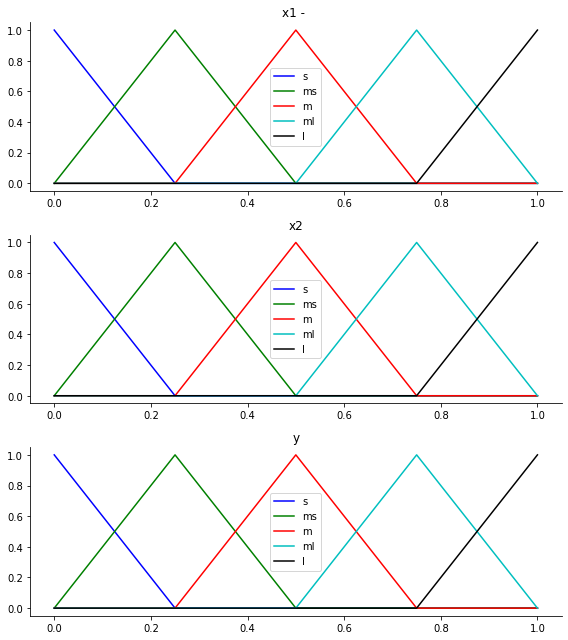

In [96]:
# Visualize these universes and membership functions
fig, (ax0, ax1, ax2) = plt.subplots(nrows=3, figsize=(8, 9))

ax0.plot(x1_range, x1_s, 'b', linewidth=1.5, label='s')
ax0.plot(x1_range, x1_ms, 'g', linewidth=1.5, label='ms')
ax0.plot(x1_range, x1_m, 'r', linewidth=1.5, label='m')
ax0.plot(x1_range, x1_ml, 'c', linewidth=1.5, label='ml')
ax0.plot(x1_range, x1_l, 'k', linewidth=1.5, label='l')
ax0.set_title('x1 - ')
ax0.legend()


ax1.plot(x2_range, x2_s, 'b', linewidth=1.5, label='s')
ax1.plot(x2_range, x2_ms, 'g', linewidth=1.5, label='ms')
ax1.plot(x2_range, x2_m, 'r', linewidth=1.5, label='m')
ax1.plot(x2_range, x2_ml, 'c', linewidth=1.5, label='ml')
ax1.plot(x2_range, x2_l, 'k', linewidth=1.5, label='l')
ax1.set_title('x2')
ax1.legend()

ax2.plot(y_range, y_s, 'b', linewidth=1.5, label='s')
ax2.plot(y_range, y_ms, 'g', linewidth=1.5, label='ms')
ax2.plot(y_range, y_m, 'r', linewidth=1.5, label='m')
ax2.plot(y_range, y_ml, 'c', linewidth=1.5, label='ml')
ax2.plot(y_range, y_l, 'k', linewidth=1.5, label='l')
ax2.set_title('y')
ax2.legend()

# Turn off top/right axes
for ax in (ax0, ax1, ax2):
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.get_xaxis().tick_bottom()
    ax.get_yaxis().tick_left()

plt.tight_layout()

In [97]:
# Calculate Performance index
b_dict = {1: {}, 2: {}, 3: {}, 4: {}, 5: {}}
for i in range(5):
  for j in range(5):
    res = b_calc(x1, x2, yp, i+1, j+1)
    b_dict[i+1][j+1] = res

print(performance_index(x1, x2, yp, b_dict))

# Get Main and secondary labels
main_dict = {1: {}, 2: {}, 3: {}, 4: {}, 5: {}}
second_dict = {1: {}, 2: {}, 3: {}, 4: {}, 5: {}}
for i in range(5):
  for j in range(5):
    b_j1_j2_val = b_dict[i+1][j+1]
    max_class, max_value, _ = membership_solver_max(b_j1_j2_val)
    main_dict[i+1][j+1] = max_class

for i in range(5):
  for j in range(5):
    b_j1_j2_val = b_dict[i+1][j+1]
    max_second_class, max_second_value, _ = membership_solver_second_max(b_j1_j2_val)
    second_dict[i+1][j+1] = max_second_class
  
display(main_dict)
display(second_dict)

0.007644384829792161


{1: {1: 'ML', 2: 'S', 3: 'S', 4: 'S', 5: 'S'},
 2: {1: 'ML', 2: 'MS', 3: 'MS', 4: 'S', 5: 'MS'},
 3: {1: 'L', 2: 'M', 3: 'MS', 4: 'MS', 5: 'MS'},
 4: {1: 'L', 2: 'M', 3: 'M', 4: 'M', 5: 'M'},
 5: {1: 'ML', 2: 'ML', 3: 'M', 4: 'M', 5: 'M'}}

{1: {1: 'M', 2: 'MS', 3: 'MS', 4: 'MS', 5: 'MS'},
 2: {1: 'M', 2: 'S', 3: 'S', 4: 'MS', 5: 'S'},
 3: {1: 'ML', 2: 'MS', 3: 'M', 4: 'M', 5: 'M'},
 4: {1: 'ML', 2: 'ML', 3: 'MS', 4: 'MS', 5: 'ML'},
 5: {1: 'M', 2: 'M', 3: 'ML', 4: 'ML', 5: 'ML'}}

In [98]:
upsampled = np.linspace(-2, 2, 21)
x_orig2 = [1, 2, 3, 4, 5]
y_orig2 = [1, 2, 3, 4, 5]
z_dict = {1: {1: 'ML', 2: 'S', 3: 'S', 4: 'S', 5: 'S'},
 2: {1: 'ML', 2: 'MS', 3: 'MS', 4: 'S', 5: 'MS'},
 3: {1: 'L', 2: 'M', 3: 'MS', 4: 'MS', 5: 'MS'},
 4: {1: 'L', 2: 'M', 3: 'M', 4: 'M', 5: 'M'},
 5: {1: 'ML', 2: 'ML', 3: 'M', 4: 'M', 5: 'M'}}
z_dict2 = {1: {1: 'M', 2: 'MS', 3: 'MS', 4: 'MS', 5: 'MS'},
 2: {1: 'M', 2: 'S', 3: 'S', 4: 'MS', 5: 'S'},
 3: {1: 'ML', 2: 'MS', 3: 'M', 4: 'M', 5: 'M'},
 4: {1: 'ML', 2: 'ML', 3: 'MS', 4: 'MS', 5: 'ML'},
 5: {1: 'M', 2: 'M', 3: 'ML', 4: 'ML', 5: 'ML'}}
z_dict = z_dict2

[[3 2 2 2 2]
 [3 1 1 2 1]
 [4 2 3 3 3]
 [4 4 2 2 4]
 [3 3 4 4 4]]


/usr/local/lib/python3.7/dist-packages/mpl_toolkits/mplot3d/art3d.py:304: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  self._segments3d = np.asanyarray(segments)


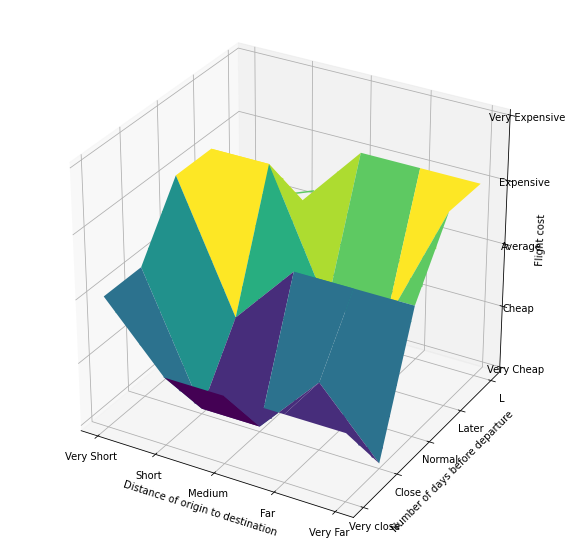

In [99]:
%matplotlib inline
def convert_label_to_int(label):
  res = 0
  if label =="L":
    res = 5
  if label == "ML":
    res = 4
  if label == "M":
    res = 3
  if label == "MS":
    res = 2
  if label == "S":
    res = 1
  return res
# We can simulate at higher resolution with full accuracy
x, y = np.meshgrid(x_orig2, y_orig2)
z = np.zeros_like(x)
# Loop through the system 21*21 times to collect the control surface
for i in range(5):
  for j in range(5):
    res = convert_label_to_int(z_dict[i+1][j+1])
    z[i,j] = res
print(z)
# Plot the result in pretty 3D with alpha blending
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D # Required for 3D plotting

fig = plt.figure(figsize=(10, 10))
axes = fig.gca(projection="3d")
axes.plot_surface(x, y, z,cmap="viridis")
plt.xticks([1,2,3,4,5], ["Very Short", "Short", "Medium", "Far", "Very Far"])
plt.yticks([1,2,3,4,5], ["Very close", "Close", "Normal", "Later", "L"])
plt.xlabel("Distance of origin to destination")
plt.ylabel("Number of days before departure")
axes.set_zlim3d(1, 5)
axes.set_zticks([1,2,3,4,5])
axes.set_zticklabels(["Very Cheap", "Cheap", "Average", "Expensive", "Very Expensive"])
axes.set_zlabel("Flight cost")
plt.contour(x, y, z,cmap="viridis")
plt.show()
# ax = fig.add_subplot(111, projection='3d')
# surf = ax.plot_surface(x, y, z, rstride=1, cstride=1, cmap='viridis',
# linewidth=0.4, antialiased=True)
# cset = ax.contourf(x, y, z, cmap='viridis', alpha=0.7)
# cset = ax.contourf(x, y, z, zdir='x', cmap='viridis', alpha=0.5)
# cset = ax.contourf(x, y, z, zdir='y', cmap='viridis', alpha=0.5)
# ax.mouse_init()